In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [55]:
def winGame(p):
    """
    PURPOSE: Calculates the probability of the server winning a game
    PARAMETERS:
        p: The probability of the server winning point
        cacheArray: stores previosuly calculated probabilities to speed up things for larger simulations
    RETURNS: The probability of winning the game
    """
    cumProb=0
    for i in range(4,7):
        cumProb+=binomialProb(i,6,p)
    cumProb+=binomialProb(3,6,p)*winFromDeuce(p)
    return cumProb

def binomialProb(x,n,p):
    """ 
    PURPOSE: Calculates the probability of the event ocurring
    PARAMETERS:
        x: The number of successes
        n: The number of trials
        p: The probability of success for a given trial
    RETURNS: The probability of getting x successes in n trials
    """
    return math.comb(n,x)*np.power(p,x)*np.power(1-p,n-x)

def winFromDeuce(p):
    """
    PURPOSE: Calculates the probability of the server winning a game after reachind deuce
    PARAMETERS:
        p: The probability of the server winning point
    RETURNS: The probability of winning the game
    """
    return p**2/(p**2+(1-p)**2)



In [53]:
def runSimGame(serverWinProb,n):
    """
    PURPOSE: Simulates a series of games and calculates what percent the server won
    PARAMETERS:
        serverWinProb: The probability of the server winning a point
        n:             The number of games to simulate
    RETURNS: The percent of simulated games that were won by the server
    """
    scoreDict = {
      "Server": 0,
      "Returner": 0
    }
    for i in range (0,n):
        if simGame(serverWinProb)==1:
            scoreDict["Server"]+=1
        else: 
            scoreDict["Returner"]+=1
    return scoreDict["Server"]/n
def simGame(serverWinProb):
    """
    PURPOSE: Simulates a game
    PARAMETERS:
        serverWinProb: The probability of the server winning a point
    RETURNS: 1 if the server won the game, 0 if the returner won the game
    """
    point=0
    scoreDict = {
      "Server": 0,
      "Returner": 0
    }
    while True:
        point=point+1
        if simPoint(serverWinProb)==1:
            scoreDict["Server"]+=1
        else: 
            scoreDict["Returner"]+=1
        if scoreDict["Server"]>=4 and scoreDict["Server"]-scoreDict["Returner"]>=2:
            return 1
        if scoreDict["Returner"]>=4 and scoreDict["Returner"]-scoreDict["Server"]>=2:
            return 0
def simPoint(serverWinProb):
    """
    PURPOSE: Simulates a point
    PARAMETERS:
        serverWinProb: The probability of the server winning the point
    RETURNS: 1 if the server won the point, 0 if the returner won the point
    """
    if serverWinProb>np.random.rand():
        return 1
    return 0

In [54]:
n1=1000
n2=10000
resolution=101
pWinPoint=np.linspace(0, 1, resolution)
pWinGame1000= np.empty([resolution])
pWinGame10000= np.empty([resolution])
#Simulate 1,000 and 10,000 games for each value of p
for i in range(0,len(pWinPoint)):
    pWinGame1000[i]=runSimGame(pWinPoint[i],n1)
    pWinGame10000[i]=runSimGame(pWinPoint[i],n2)


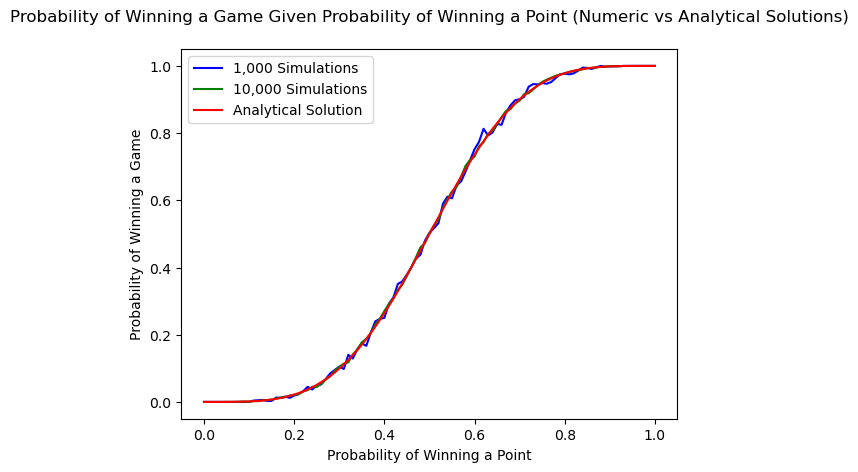

In [5]:
plt.plot(pWinPoint, pWinGame1000, color='blue', label = '1,000 Simulations')
plt.plot(pWinPoint, pWinGame10000, color='green', label = '10,000 Simulations')
plt.plot(pWinPoint, winGame(pWinPoint), color='red', label='Analytical Solution')

plt.xlabel('Probability of Winning a Point')
plt.ylabel('Probability of Winning a Game')
plt.title('Probability of Winning a Game Given Probability of Winning a Point (Numeric vs Analytical Solutions)',pad=20)
plt.legend()
plt.show()

In [6]:
def runSimSet(serverWinProbSide1,serverWinProbSide2,n):
    """
    PURPOSE: Simulates a series of sets and calculates what percent the first server won
    PARAMETERS:
        serverWinProbSide1: The probability of the server winning a point when serving from side 1
        serverWinProbSide2: The probability of the server winning a point when servering from side 2
        n:                  The number of sets to simulate
    RETURNS: The percent of simulated sets that were won by the first server
    """
    if serverWinProbSide1==1 and serverWinProbSide2==1:
        return np.NaN
    if serverWinProbSide1==0 and serverWinProbSide2==0:
        return np.NaN
    scoreDict = {
        0:0,
        1:0,
        2:0
    }
    for i in range (0,n):
        result=simSet(serverWinProbSide1,serverWinProbSide2)
        if result==0:
            if simTieBreak(serverWinProbSide1,serverWinProbSide2)==1:
                result=1
            else:
                result=2
        if result==1:
            scoreDict[1]+=1
        elif result==2:
            scoreDict[2]+=1
    return scoreDict[1]/n

def simSet(serverWinProbSide1,serverWinProbSide2):
    """
    PURPOSE: Simulates a set
    PARAMETERS:
        serverWinProbSide1: The probability of the server winning a point when serving from side 1
        serverWinProbSide2: The probability of the server winning a point when servering from side 2
    RETURNS: 1 if the server won the set, 0 if the returner won the set
    """
    game=0
    server=1
    side=1
    winGameSide1=winGame(serverWinProbSide1)
    winGameSide2=winGame(serverWinProbSide2)
    scoreDict = {
        1:0,
        2:0
    }
    while True:
        game=game+1
        if side==1:
            serverWinProb=winGameSide1
        else:
            serverWinProb=winGameSide2
        if simPoint(serverWinProb):
            scoreDict[server]+=1
        else:
            scoreDict[server%2+1]+=1
        if scoreDict[1]>=6 and scoreDict[1]-scoreDict[2]>=2:
            return 1
        if scoreDict[2]>=6 and scoreDict[2]-scoreDict[1]>=2:
            return 2
        if scoreDict[2]==6 and scoreDict[1]==6:
            return 0
        server=server%2+1
        side=side%2+1
        if game%2==1:
            side=side%2+1 
def simTieBreak(serverWinProbSide1,serverWinProbSide2):
    """
    PURPOSE: Simulates a tiebreaker
    PARAMETERS:
        serverWinProbSide1: The probability of the server winning a point when serving from side 1
        serverWinProbSide2: The probability of the server winning a point when servering from side 2
    RETURNS: 1 if the server won the tiebreaker, 0 if the returner won the tiebreaker
    """
    point=0
    server=1
    side=1
    scoreDict = {
        1:0,
        2:0
    }
    while True:
        point=point+1
        if side==1:
            serverWinProb=serverWinProbSide1
        else:
            serverWinProb=serverWinProbSide2

        if simPoint(serverWinProb):
            scoreDict[server]+=1
        else:
            scoreDict[server%2+1]+=1
        if scoreDict[1]>=7 and scoreDict[1]-scoreDict[2]>=2:
            return 1
        if scoreDict[2]>=7 and scoreDict[2]-scoreDict[1]>=2:
            return 2
        if point%2==1:
            server=server%2+1
            side=side%2+1
        if point%6==0:
            side=side%2+1

def runSimTiebreak(serverWinProbSide1,serverWinProbSide2,n):
    """
    DEPRECATED
    PURPOSE: Simulates a series of tiebreakers and calculates what percent the first server won
    PARAMETERS:
        serverWinProbSide1: The probability of the server winning a point when serving from side 1
        serverWinProbSide2: The probability of the server winning a point when servering from side 2
        n:                  The number of tiebreakers to simulate
    RETURNS: The percent of simulated tiebreakers that were won by the first server
    """
    if serverWinProbSide1==1 and serverWinProbSide2==1:
        return np.NaN
    if serverWinProbSide1==0 and serverWinProbSide2==0:
        return np.NaN
    scoreDict = {
        1:0,
        2:0
    }
    for i in range (0,n):
        scoreDict[simTieBreak(serverWinProbSide1,serverWinProbSide2)]+=1
    return scoreDict[1]/n

In [8]:
resolution=21
n=10000
serverWinProbSide1 = np.linspace(0, 1, resolution).round(2)
serverWinProbSide2 = np.linspace(0, 1, resolution).round(2)
P1, P2 = np.meshgrid(serverWinProbSide1, serverWinProbSide2)
ServerProbabilityArray=np.empty([resolution,resolution])
ReturnerProbabilityArray=np.empty([resolution,resolution])
for row in range (0,resolution):
    for col in range (0,resolution):
        p1=P1[row][col]
        p2=P2[row][col]
        probabilityServerWins=runSimSet(p1, p2,n)
        ServerProbabilityArray[row][col]=probabilityServerWins
        ReturnerProbabilityArray[row][col]=1-probabilityServerWins
        

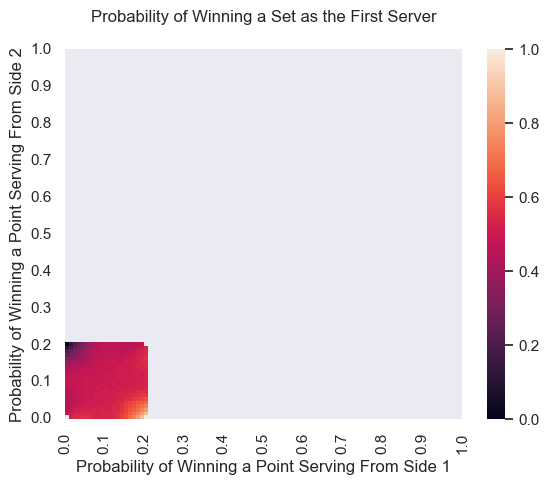

In [57]:
serverDf = pd.DataFrame(ServerProbabilityArray, index=serverWinProbSide1,columns=serverWinProbSide2)
sns.set()


ax = sns.heatmap(serverDf)
ax.invert_yaxis()
tickPositions=np.linspace(0, resolution, 11).round(2)
tickLabels=np.linspace(0, 1, 11).round(2)
ax.set_xticks(tickPositions)
ax.set_xticklabels(tickLabels)
ax.set_yticks(tickPositions)
ax.set_yticklabels(tickLabels)


plt.xlabel('Probability of Winning a Point Serving From Side 1')
plt.ylabel('Probability of Winning a Point Serving From Side 2')
plt.title('Probability of Winning a Set as the First Server',pad=20)
plt.show()

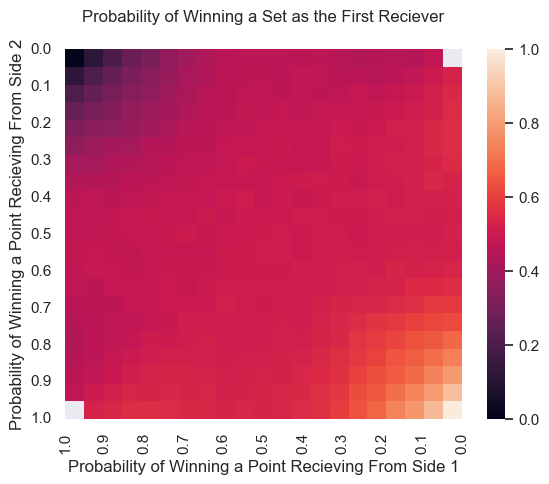

In [37]:
returnerDf = pd.DataFrame(ReturnerProbabilityArray, index=1-serverWinProbSide1,columns=1-serverWinProbSide2)
sns.set()


ax = sns.heatmap(returnerDf)
ax.invert_xaxis()

tickPositions=np.linspace(0, resolution, 11).round(2)
tickLabels=np.linspace(0, 1, 11).round(2)
ax.set_xticks(tickPositions)
ax.set_xticklabels(tickLabels)
ax.set_yticks(tickPositions)
ax.set_yticklabels(tickLabels)

plt.xlabel('Probability of Winning a Point Recieving From Side 1')
plt.ylabel('Probability of Winning a Point Recieving From Side 2')
plt.title('Probability of Winning a Set as the First Reciever',pad=20)
plt.show()

In [52]:
'''Confirm that it doesn't matter wether your opponent chooses to server or recieve after you pick side'''

#Calculate the probability and error bounds of winning a set serving
#Given article's inital conditions if your opponent chooses to serve
n=10000000
p1=0.8
p2=0.55
simProb=runSimSet(p1,p2,n)
SD=np.sqrt(simProb*(1-simProb)/n)
simLowerBound=simProb-SD*1.96
simUpperBound=simProb+SD*1.96
print(simLowerBound,simProb,simUpperBound)

#Calculate the probability and error bounds of winning a set recieving
#given article's inital conditions if your opponent chooses to recieve
n=10000000
p1=0.55
p2=0.8
simProb=1-runSimSet(p1,p2,n)
SD=np.sqrt(simProb*(1-simProb)/n)
simLowerBound=simProb-SD*1.96
simUpperBound=simProb+SD*1.96
print(simLowerBound,simProb,simUpperBound)

0.5093910551232022 0.5097009 0.5100107448767979
0.5147345371024519 0.5150443 0.5153540628975481


,0.00,0.05,0.05,0.10,0.10,0.15,0.15,0.20,0.20,0.25,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0109,...,0.0007,-0.0088,0.0054,0.0033,-0.0016,0.0119,-0.0106,0.0137,0.0114,0.0000
0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.25,-0.0041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0040,...,-0.0018,0.0054,0.0027,-0.0084,-0.0016,-0.0186,0.0063,-0.0086,-0.0037,0.0171
